In [210]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [17]:
cv2.__version__

'3.1.0'

In [115]:
img1 = cv2.imread('img1.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('img2.png', cv2.IMREAD_COLOR)

In [119]:
# opencv : BGR, matplotlib : RGB
b, g, r = cv2.split(img1)
img1 = cv2.merge([r, g, b])
b, g, r = cv2.split(img2)
img2 = cv2.merge([r, g, b])

In [120]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [121]:
img1_file = plt.imread('img1.png')
img2_file = plt.imread('img2.png')

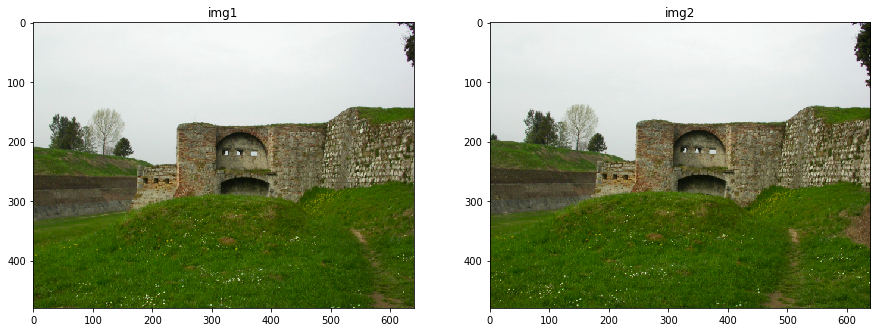

In [122]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img1)
plt.title('img1')

plt.subplot(122)
plt.imshow(img2)
plt.title('img2')
plt.show()

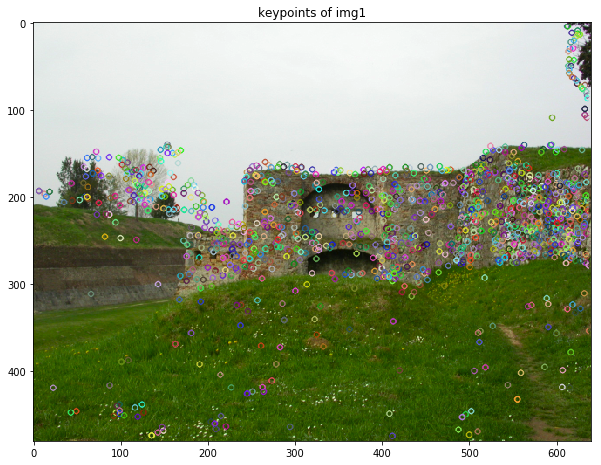

In [147]:
sift = cv2.xfeatures2d.SIFT_create()
(kp1, descs1) = sift.detectAndCompute(gray1, None)
sift_img = cv2.drawKeypoints(img1, kp, None)

plt.figure(figsize=(10, 10))
plt.imshow(sift_img)
plt.title('keypoints of img1')
plt.show()

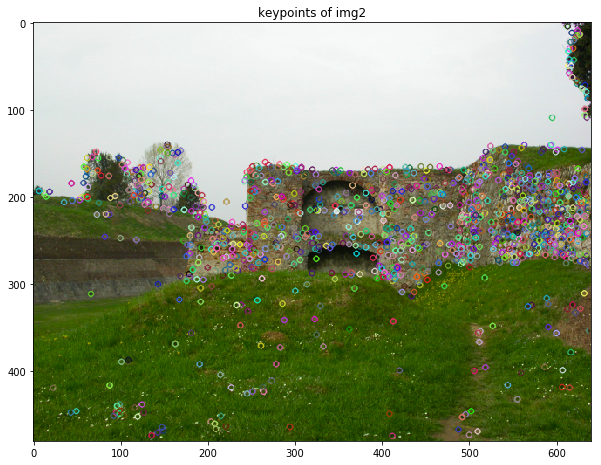

In [148]:
sift2 = cv2.xfeatures2d.SIFT_create()
(kp2, descs2) = sift.detectAndCompute(gray2, None)
sift_img2 = cv2.drawKeypoints(img2, kp, None)

plt.figure(figsize=(10, 10))
plt.imshow(sift_img2)
plt.title('keypoints of img2')
plt.show()

In [144]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(descs1, descs2, k=2)

In [145]:
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

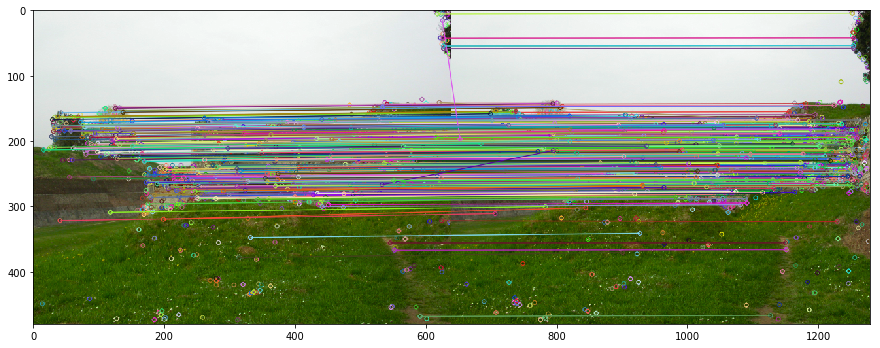

In [146]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None)
plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.title('matches')
plt.show()

In [158]:
# 매칭점 인덱스 알아내기
pt = []

for i in range(1, 9):
    pt.append((good[i][0].queryIdx, good[i][0].trainIdx))


In [196]:
# 매칭점 좌표 알아내기
coordi = []

for i in range(8):
    coordi.append((np.round(kp1[pt[i][0]].pt), np.round(kp2[pt[i][1]].pt)))

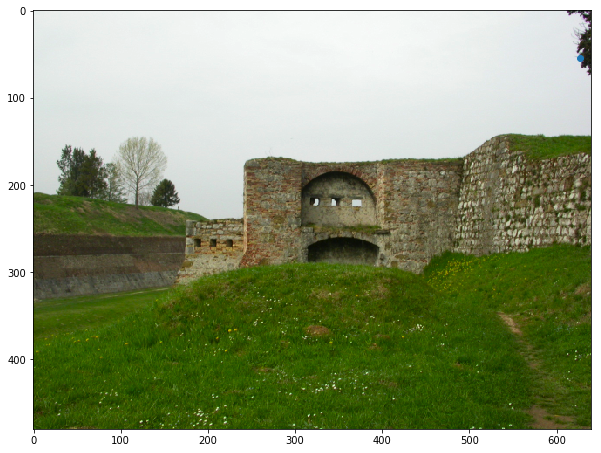

In [139]:
plt.figure(figsize=(10,10))
plt.imshow(img1)
plt.scatter(x=kp1[4].pt[0], y=kp1[4].pt[1])
plt.show()

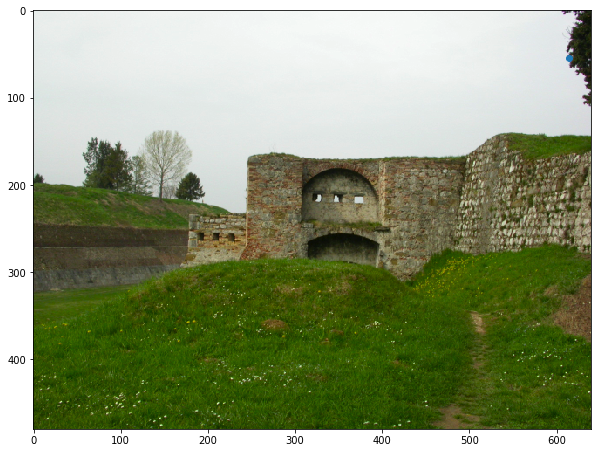

In [140]:
plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.scatter(x=kp2[517].pt[0], y=kp2[517].pt[1])
plt.show()

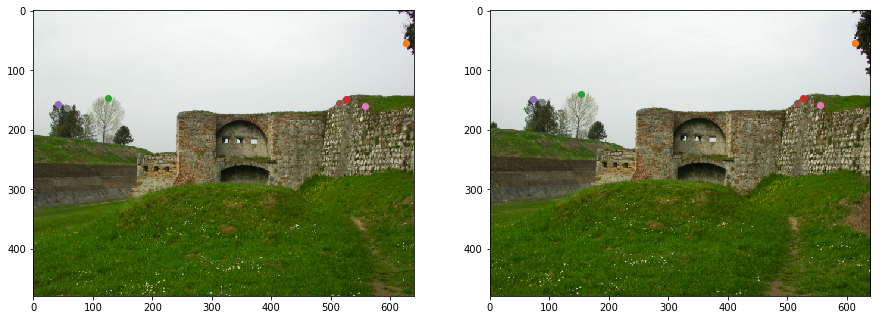

In [199]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img1)
for i in range(8):
    plt.scatter(x=coordi[i][0][0], y=coordi[i][0][1])

plt.subplot(122)
plt.imshow(img2)
for i in range(8):
    plt.scatter(x=coordi[i][1][0], y=coordi[i][1][1])
plt.show()

In [200]:
# A Matrix 구하기
A = []

for i in range(8):
    A.append([coordi[i][0][0]*coordi[i][1][0], coordi[i][0][0]*coordi[i][1][1], coordi[i][0][0], coordi[i][0][1]*coordi[i][1][0], coordi[i][0][1]*coordi[i][1][1], coordi[i][0][1], coordi[i][1][0], coordi[i][1][1], 1])

In [207]:
A

[[384978.0, 33858.0, 627.0, 33156.0, 2916.0, 54.0, 614.0, 54.0, 1],
 [384978.0, 33858.0, 627.0, 33156.0, 2916.0, 54.0, 614.0, 54.0, 1],
 [19250.0, 17500.0, 125.0, 22638.0, 20580.0, 147.0, 154.0, 140.0, 1],
 [277202.0, 76796.0, 526.0, 77996.0, 21608.0, 148.0, 527.0, 146.0, 1],
 [3024.0, 6216.0, 42.0, 11304.0, 23236.0, 157.0, 72.0, 148.0, 1],
 [265224.0, 79670.0, 514.0, 80496.0, 24180.0, 156.0, 516.0, 155.0, 1],
 [310248.0, 88722.0, 558.0, 88960.0, 25440.0, 160.0, 556.0, 159.0, 1],
 [4959.0, 8778.0, 57.0, 14181.0, 25102.0, 163.0, 87.0, 154.0, 1]]

In [220]:
df = pd.DataFrame(data=A)
df.style

In [202]:
# SVD(A)
U, S, V = np.linalg.svd(A)

In [228]:
# 

V[-1]

F = V[-1]
F = np.array(F)

In [425]:
F = F.reshape(3, 3).transpose()
df = pd.DataFrame(data=F)
df.style

In [426]:
print(F.shape)
print(np.array([[coordi[i][1][0]], [coordi[i][1][1]], [1]]).shape)
print((F*np.array([[coordi[i][1][0]], [coordi[i][1][1]], [1]])).shape)

(3, 3)
(3, 1)
(3, 3)


In [427]:
# line
line = []
for i in range(8):
    line.append(np.dot(F, np.array([[coordi[i][1][0]], [coordi[i][1][1]], [1]])))

In [429]:
line= np.array(line)

In [430]:
line = line.reshape(8, 3)

In [431]:
# line vector

df = pd.DataFrame(data=line)
df

0         1          2
0 -0.009220 -0.018110   6.572245
1 -0.009220 -0.018110   6.572245
2 -0.019721 -0.087183  15.269754
3 -0.022883 -0.026782  15.931970
4 -0.020462 -0.099921  16.073461
5 -0.024205 -0.028031  16.847254
6 -0.025062 -0.021359  17.260188
7 -0.021477 -0.097158  16.686706

In [432]:
plt.figure(figsize=(10, 10))
plt.imshow(img1)
x = []
y = []
for i in range(8):
    plt.scatter(x=coordi[i][0][0], y=coordi[i][0][1])
    for j in range(1, 640):
        y = -(line[i][0]*j + line[i][2]) / line[i][1]
        plt.plot([j], [y], marker='1', markersize=1, color='blue')

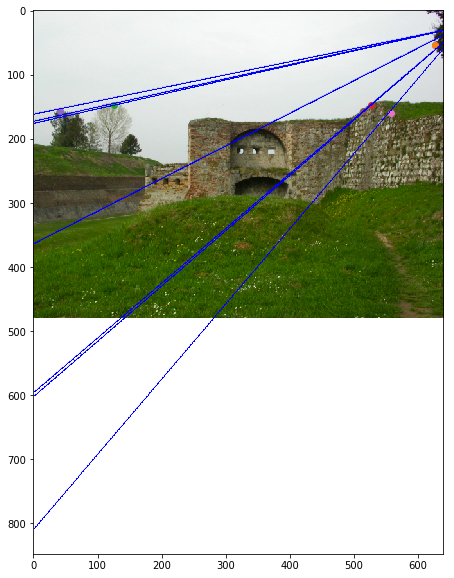

In [433]:

plt.show()

In [378]:
del np_img1
del np_img2

In [434]:
np_img1 = np.zeros((3, 8))
np_img2 = np.zeros((3, 8))

for i in range(8):
    np_img1[:, i] = [coordi[i][0][0], coordi[i][0][1], 1]
    np_img2[:, i] = [coordi[i][1][0], coordi[i][1][1], 1]
    
np_img1 = np.array(np_img1)
np_img2 = np.array(np_img2)

In [435]:
np_img1

array([[ 627.,  627.,  125.,  526.,   42.,  514.,  558.,   57.],
       [  54.,   54.,  147.,  148.,  157.,  156.,  160.,  163.],
       [   1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.]])

In [437]:
# Normalized 

def normalize(pts):
    
    # centroid 구하기
    C = [np.mean(pts[0]), np.mean(pts[1])]
    print(C)
    
    new_pts = np.zeros((3, 8))
    print(new_pts)
    
    # shift the origin to centroid
    new_pts[0] = pts[0] - C[0]
    new_pts[1] = pts[1] - C[1]
    print(new_pts)
    
    mean_dist = np.mean(np.sqrt(np.power(new_pts[0], 2) + np.power(new_pts[1], 2)))
    scale = np.sqrt(2) / mean_dist
    
    T = [[scale, 0, -scale*C[0]], [0, scale, -scale*C[1]], [0, 0, 1]]
    print(T)
    npts = np.dot(T, pts)
    
    return npts, T

In [325]:
np_img1[:1]

[(627.0, 54.0, 1)]

In [367]:
C = np.mean((np_img1[:, 0], np_img1[:, 1]))
print(C)

257.1875


In [438]:
npt_left, T1 = normalize(np_img1)

[384.5, 129.875]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 242.5    242.5   -259.5    141.5   -342.5    129.5    173.5   -327.5  ]
 [ -75.875  -75.875   17.125   18.125   27.125   26.125   30.125   33.125]
 [   0.       0.       0.       0.       0.       0.       0.       0.   ]]
[[0.0059802202976935292, 0, -2.299394704463162], [0, 0.0059802202976935292, -0.77668111116294714], [0, 0, 1]]


In [439]:
npt_right, T2 = normalize(np_img2)

[392.5, 126.25]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 221.5   221.5  -238.5   134.5  -320.5   123.5   163.5  -305.5 ]
 [ -72.25  -72.25   13.75   19.75   21.75   28.75   32.75   27.75]
 [   0.      0.      0.      0.      0.      0.      0.      0.  ]]
[[0.0064196551726074637, 0, -2.5197146552484293], [0, 0.0064196551726074637, -0.81048146554169231], [0, 0, 1]]


In [462]:
nA = np.zeros((8, 9))

for i in range(8):
    nx_left = npt_left[0, i]
    ny_left = npt_left[1, i]
    nx_right = npt_right[0, i]
    ny_right = npt_right[1, i]
    
    nA[i, :] = [nx_left*nx_right, nx_left*ny_right, nx_left, ny_left*nx_right, ny_left*ny_right, ny_left, nx_right, ny_right, 1]

In [463]:
Un, Dn, Vn = np.linalg.svd(nA)

In [464]:
nF = Vn[-1].reshape(3, 3)

In [465]:
nF

array([[ 0.0114843 , -0.23424221, -0.29428028],
       [ 0.2160607 , -0.11489087, -0.60760346],
       [ 0.29625493,  0.58419297, -0.01689054]])

In [466]:
nU, nD, nV = np.linalg.svd(nF)

In [467]:
nF = np.dot(np.dot(nU, np.diag([nD[0], nD[1], 0])), nV.transpose())

In [468]:
nF = np.dot(np.array(T2).transpose(), nF, np.array(T1))

In [469]:
nF

array([[  8.67908416e-05,  -1.37372777e-03,  -1.98510942e-03],
       [  1.50292120e-03,  -5.27435940e-04,  -3.89172516e-03],
       [  1.05667624e-01,   1.17081488e+00,   1.30934389e+00]])

In [470]:
nLine = np.zeros((8, 3))

for i in range(8):
    nLine[i, :] = np.dot(F, [coordi[i][1][0], coordi[i][1][1], 1])
    

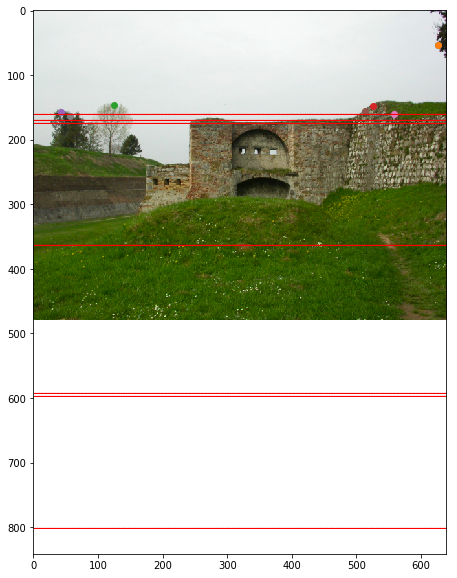

In [474]:
plt.figure(figsize=(10, 10))
plt.imshow(img1)

for i in range(8):
    plt.scatter(x=coordi[i][0][0], y=coordi[i][0][1])
    for j in range(1, 640):
        y = - (nLine[i, 0]*i + nLine[i, 2]) / nLine[i, 1]
        plt.plot([j], [y], marker='1', markersize=1, color='red')

plt.show()